<a href="https://colab.research.google.com/github/praneethamalakapalli/jdoodle/blob/main/Copy_of_Face_Recognition_with_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

data = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Let's rename the dataset's contents for easier and more convenient access.

In [2]:
# rename dataset for easy access
X = data["data"]
imgs = data["images"]
y = data["target"]

# Preview of the Dataset

Before directly diving into classification, let's see a preview of the dataset. To do that, we'll plot first face image of every person, 40 faces in total using the matplotlib library.

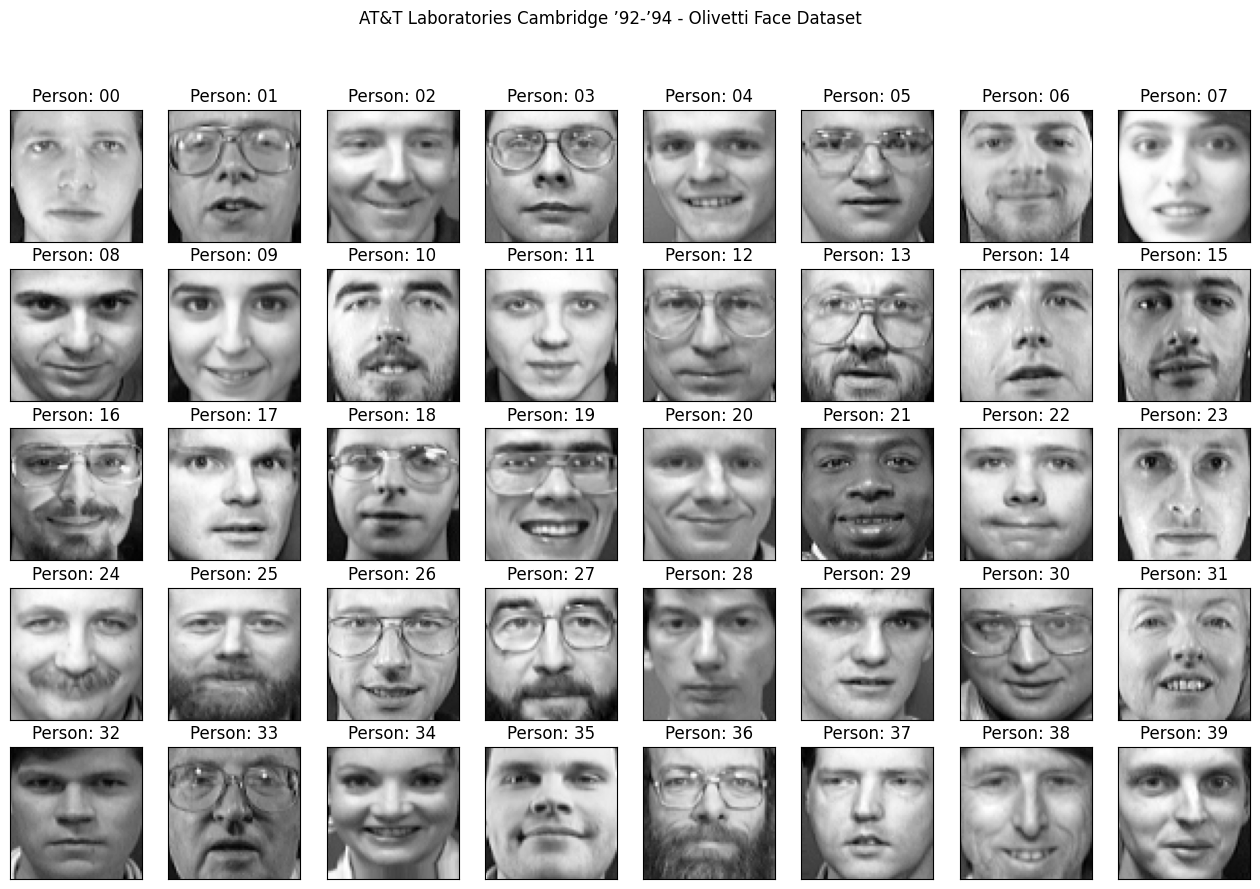

In [3]:
%matplotlib inline
from math import ceil
from matplotlib import pyplot as plt

# select unique people ids
people_ids = set(y)

# setting layout for subplots.
n_cols = 8
n_rows = ceil(len(people_ids) / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))

# iterate over the ids of people and plot first image for each of them
for person_id in people_ids:
    # finding indexes of the person_id
    person_ixs = y == person_id
    # selecting the images of the person and picking the first one for preview
    image = data["images"][person_ixs][0]
    # plotting the image as grayscale
    axes[person_id // n_cols][person_id % n_cols].imshow(image, cmap="gray")
    # setting subplot title
    title = "Person: {:02d}".format(person_id)
    axes[person_id // n_cols][person_id % n_cols].set_title(title)

# removing ticks on x & y axis
plt.setp(axes, xticks=[], yticks=[])

# setting general plot title
plt.suptitle("AT&T Laboratories Cambridge ’92-’94 - Olivetti Face Dataset")

plt.show()

In [4]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# split data randomly into train & test sets by preserving train/test ratio across classes
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# get the train and test indexes
train_index, test_index = next(sss.split(X, y))

# split X and y into train & test sets
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

# Print statistics about it
print(f"Train data size: {len(y_train)}")
print(f"Test data size : {len(y_test)}")

Train data size: 320
Test data size : 80


In [5]:
from sklearn.svm import SVC
import timeit

# define the SVM classifier with a Radial Basis Function (RBF) kernel.
classifier = SVC(kernel="rbf", gamma="scale", random_state=0)

Then using training data and labels, train the classifier model using the `fit` function.

In [6]:
# train the classifier and keep track of the time for training.
time = timeit.timeit(lambda: classifier.fit(X_train, y_train), number=1)
print(f"Training completed in {time:.2f} secs.")

Training completed in 0.99 secs.


As we have completed training of the classifier, let's see what it predicts when we try to classify our test data.

In [7]:
y_pred = classifier.predict(X_test)

In order to measure the performance of the classifier, we can use `accuracy_score` metric of the scikit-learn library. Accuracy score is the percentage of correctly predicted samples among all test samples.

In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {100 * accuracy:.2f}%")

num_correct = np.sum(y_test == y_pred)
print(f"Number of correctly classified samples: {num_correct}")

num_incorrect = len(y_test) - num_correct
print(f"Number of incorrectly classified samples: {num_incorrect}")

Accuracy score: 95.00%
Number of correctly classified samples: 76
Number of incorrectly classified samples: 4


With a couple of lines, we have successfully created a face recognition model which works quite good!